In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Function to simulate Mean-Reverting Process (Ornstein-Uhlenbeck Process)
def simulate_mean_reverting(X0, mu, kappa, sigma, T, N, num_simulations=1):
    dt = T / N
    X_paths = np.zeros((num_simulations, N))
    for i in range(num_simulations):
        W = np.random.randn(N) * np.sqrt(dt)
        X = np.zeros(N)
        X[0] = X0
        for t in range(1, N):
            X[t] = X[t-1] + kappa * (mu - X[t-1]) * dt + sigma * W[t]
        X_paths[i, :] = X
    return X_paths

In [8]:
# Parameters
S0 = 100  # Initial price
mu = 0.05  # Drift for GBM
sigma_gbm = 0.2  # Volatility for GBM
T = 1  # Time horizon (1 year)
N = 252  # Number of time steps (daily data)
kappa = 0.3  # Mean reversion speed
sigma_mr = 2  # Volatility for Mean-Reverting model
mu_mr = 100  # Long-run mean for Mean-Reverting model
X0 = 100  # Initial value for Mean-Reverting model
num_simulations = 10  # Number of paths to simulate

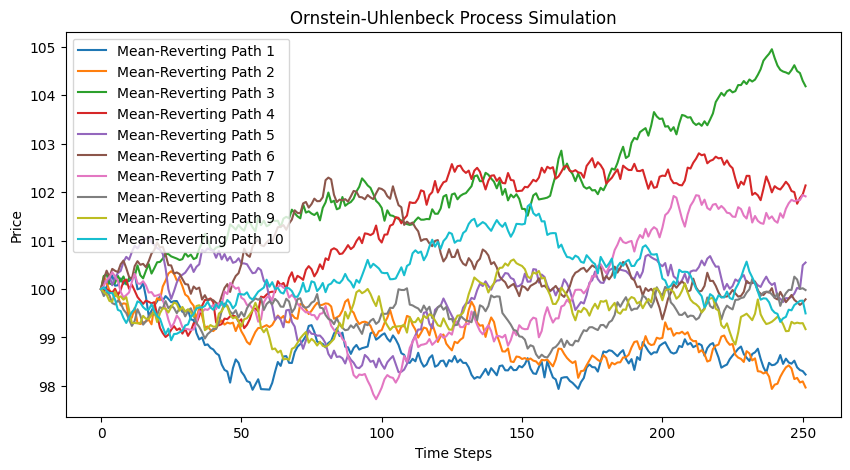

In [9]:
# Simulate and plot Mean-Reverting Process
X_mr_paths = simulate_mean_reverting(X0, mu_mr, kappa, sigma_mr, T, N, num_simulations)
plt.figure(figsize=(10, 5))
for i in range(num_simulations):
    plt.plot(X_mr_paths[i, :], label=f'Mean-Reverting Path {i+1}')
plt.title('Ornstein-Uhlenbeck Process Simulation')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.show()

In [10]:
def estimate_mean_reverting_parameters(price_series, dt):
    X_t = price_series[:-1]
    X_t1 = price_series[1:]
    beta = np.polyfit(X_t, X_t1, 1)[0]
    kappa_hat = -np.log(beta) / dt
    mu_hat = np.mean(price_series)
    sigma_hat = np.std(X_t1 - X_t)
    return kappa_hat, mu_hat, sigma_hat
